In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import json

In [9]:
def get_folder_size(path: str) -> int:
    """Return the size of a folder in bytes (recursively)."""
    total = 0
    for dirpath, _, filenames in os.walk(path):
        for filename in filenames:
            fp = os.path.join(dirpath, filename)
            if os.path.isfile(fp):
                total += os.path.getsize(fp)
    return total

In [15]:
empty_folder = np.load("empty_folder.npy")

influx_path = r"C:\Users\Lenovo\.influxdbv2\engine\data\04be9c59542a1b8a"
size_bytes = get_folder_size(influx_path)
size_mb = size_bytes/(1024*1024) - empty_folder

logs_path = r"C:\Users\Lenovo\Desktop\CNC_Influx2\logs"

largest_number = 0
latest_folder = None
for file in os.listdir(logs_path):
    parts = re.split(r"[-_.]", file)
    number_str = "".join(parts[:-1])
    number = int(number_str)
    if number > largest_number:
        largest_number = number
        latest_folder = file

log_path = os.path.join(logs_path, latest_folder)

#CSV_size
folder_name_csv = latest_folder.replace(".txt", "") 
csv_path = os.path.join(r"C:\Users\Lenovo\Desktop\CNC_Influx2\data\teste", folder_name_csv, "daq_data.csv")
size_bytes_csv = os.path.getsize(csv_path)
size_mb_csv = size_bytes_csv/(1024*1024)

new_entry1 = f"Size influx: {round(size_mb, 4)} MB"
new_entry2 = f"Size csv: {round(size_mb_csv, 4)} MB"

with open(log_path, "a") as f:
    f.write(new_entry1 + "\n")
    f.write(new_entry2 + "\n")

#Erase data from bucket
from influxdb_client import InfluxDBClient

# ---- Replace these values with your InfluxDB setup ----
token_del = "dVUcOtQscCWIT96i5vBgA9qWHDDKQ6OhOwTLcOzXPRAu6Xsbh-2MCVL6oV7_p9Y4Y7nHtyVes5MkxlQMClnmUw=="
org_del = "FEUP"
target_bucket = "Data_size_debug"
url = "http://localhost:8086"  # or your cloud URL

# Define time range (delete everything)
start = "1970-01-01T00:00:00Z"
stop = "2100-01-01T00:00:00Z"

predicate = '_measurement="sensor_data"'
predicate2 = '_measurement="sensor_data_processed"'

# Connect to InfluxDB
client = InfluxDBClient(url=url, token=token_del, org=org_del)

# Delete data
delete_api = client.delete_api()
delete_api.delete(start, stop, predicate, bucket=target_bucket, org=org_del)
delete_api.delete(start, stop, predicate2, bucket=target_bucket, org=org_del)

print("Data deleted successfully.")

influx_path = r"C:\Users\Lenovo\.influxdbv2\engine\data\04be9c59542a1b8a"
size_bytes = get_folder_size(influx_path)
size_mb = size_bytes

empty_folder = size_mb/(1024*1024)
np.save("empty_folder.npy", empty_folder)
print(f"Empty folder size saved: {empty_folder} MB")

Data deleted successfully.
Empty folder size saved: 70.2859878540039 MB


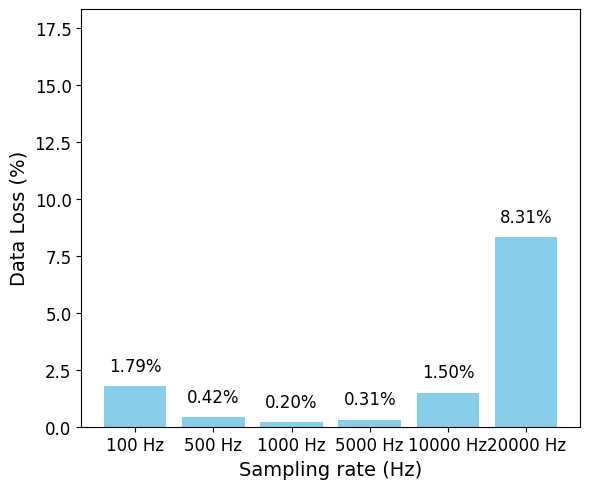

In [ ]:
path = r"C:\Users\Lenovo\Desktop\CNC_Influx2\data\teste"

folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

times = [30, 30, 30, 30, 30, 30]
sampling_rates = [100, 500, 1000, 5000, 10000, 20000]
datapoints = []

for i, folder in enumerate(folders):
    folder_path = os.path.join(path, folder)
    file_path = os.path.join(folder_path, "daq_data.csv")
    df = pd.read_csv(file_path)
        
    datapoints.append(len(df))

expected_datapoints = [t * s for t, s in zip(times, sampling_rates)]
percentage_differences = [
    np.abs((dp - expected) / expected * 100) for dp, expected in zip(datapoints, expected_datapoints)
]

sampling_rates = [str(rate) + " Hz" for rate in sampling_rates]

plt.figure(figsize=(6, 5))
bars = plt.bar(sampling_rates, percentage_differences, color='skyblue')
plt.xlabel('Sampling rate (Hz)', fontsize=14)
plt.ylabel('Data Loss (%)', fontsize=14)
plt.ylim([0, max(percentage_differences) + 10])
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Annotate each bar with its value
for bar, value in zip(bars, percentage_differences):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f"{value:.2f}%", 
             ha='center', va='bottom', fontsize=12)

plt.show()

In [14]:
print(folders)

['2025-06-18_11-51-06', '2025-06-18_11-56-42', '2025-06-18_12-01-35', '2025-06-18_12-03-43', '2025-06-18_12-08-00', '2025-06-18_12-14-21']


In [81]:
experiment_name = '2025-06-18_12-14-21'

In [82]:
def get_folder_size(path: str) -> int:
    """Return the size of a folder in bytes (recursively)."""
    total = 0
    for dirpath, _, filenames in os.walk(path):
        for filename in filenames:
            fp = os.path.join(dirpath, filename)
            if os.path.isfile(fp):
                total += os.path.getsize(fp)
    return total

# Your InfluxDB bucket path
path_influx = r"C:\Users\Lenovo\.influxdbv2\engine\data\04be9c59542a1b8a"

# Get size in bytes
size_bytes = get_folder_size(path_influx)
base = size_bytes
print(f"Base size: {base} bytes")

Base size: 34082618 bytes


In [ ]:

#from influxdb_client import InfluxDBClient, Point
#from influxdb_client.client.write_api import SYNCHRONOUS
#from collections import defaultdict
#import os
#
#client = InfluxDBClient(
#url="http://localhost:8086",
#token="dVUcOtQscCWIT96i5vBgA9qWHDDKQ6OhOwTLcOzXPRAu6Xsbh-2MCVL6oV7_p9Y4Y7nHtyVes5MkxlQMClnmUw==",
#org="FEUP"
#)
#
#target_bucket = "Data_size_debug"
#org = "FEUP"
#write_api = client.write_api(write_options=SYNCHRONOUS)
#
## Query distinct batch_ids for the experiment
#batch_id_query = f'''
#import "influxdata/influxdb/schema"
#from(bucket: "CNC data")
#|> range(start: 0)
#|> filter(fn: (r) => r["_measurement"] == "sensor_data")
#|> filter(fn: (r) => r["experiment_name"] == "{experiment_name}")
#|> keep(columns: ["batch_id"])
#|> group(columns: ["batch_id"])
#|> distinct(column: "batch_id")
#|> drop(columns: ["batch_id"])
#'''
#batch_id_tables = client.query_api().query(batch_id_query)
#batch_ids = set()
#for table in batch_id_tables:
#    for record in table.records:
#        batch_ids.add(record["_value"])
#
#all_rows = []
#for batch_id in batch_ids:
#    #print(f"Fetching batch {batch_id}")
#    query1 = f'''
#        from(bucket: "CNC data")
#        |> range(start: 0)
#        |> filter(fn: (r) => r["_measurement"] == "sensor_data")
#        |> filter(fn: (r) => r["experiment_name"] == "{experiment_name}")
#        |> filter(fn: (r) => r["batch_id"] == "{batch_id}")
#    '''
#    query2 = f'''
#        from(bucket: "CNC data")
#        |> range(start: 0)
#        |> filter(fn: (r) => r["_measurement"] == "sensor_data_processed")
#        |> filter(fn: (r) => r["experiment_name"] == "{experiment_name}")
#        |> filter(fn: (r) => r["batch_id"] == "{batch_id}")
#    '''
#
#    tables1 = client.query_api().query(query1)
#    tables2 = client.query_api().query(query2)
#
#    pivoted_data = defaultdict(dict)
#
#    for table in tables1:
#        for record in table.records:
#            timestamp = record.get_time().timestamp()
#            field = record.get_field()
#            value = record.get_value()
#            pivoted_data[timestamp][field] = value
#            pivoted_data[timestamp]['Batch_id'] = batch_id
#
#    for table in tables2:
#        for record in table.records:
#            timestamp = record.get_time().timestamp()
#            field = record.get_field()
#            value = record.get_value()
#            pivoted_data[timestamp][field] = value
#            #pivoted_data[timestamp]['Batch_id'] = batch_id
#
#    all_rows.extend([
#        {"Time": ts, **fields}
#        for ts, fields in pivoted_data.items()
#    ])
#
#all_rows.sort(key=lambda x: x['Time'])
#
#for row in all_rows:
#    point = Point("sensor_data") \
#        .tag("Batch_id", str(row.get("Batch_id", "")))
#
#    for key, value in row.items():
#        if key not in ["Time", "Batch_id"] and isinstance(value, (int, float)):
#            point = point.field(key, value)
#
#    # Convert float seconds to integer nanoseconds
#    timestamp_ns = int(row["Time"] * 1e9)
#    point = point.time(timestamp_ns, write_precision='ns')
#
#    write_api.write(bucket=target_bucket, org=org, record=point)

In [ ]:
# Get size in bytes
size_bytes = get_folder_size(path_influx)
print(f"Total size in bytes: {size_bytes-base}")

Total size in bytes: 197158973


: 

In [80]:
from influxdb_client import InfluxDBClient, DeleteApi
from influxdb_client.client.write_api import SYNCHRONOUS
from datetime import datetime

# ---- Replace these values with your InfluxDB setup ----
token_del = "dVUcOtQscCWIT96i5vBgA9qWHDDKQ6OhOwTLcOzXPRAu6Xsbh-2MCVL6oV7_p9Y4Y7nHtyVes5MkxlQMClnmUw=="
org_del = "FEUP"
target_bucket = "Data_size_debug"
url = "http://localhost:8086"  # or your cloud URL

# Define time range (delete everything)
start = "1970-01-01T00:00:00Z"
stop = "2100-01-01T00:00:00Z"

predicate = '_measurement="sensor_data"'

# Connect to InfluxDB
client = InfluxDBClient(url=url, token=token_del, org=org_del)

# Delete data
delete_api = client.delete_api()
delete_api.delete(start, stop, predicate, bucket=target_bucket, org=org_del)

print("Data deleted successfully.")


Data deleted successfully.


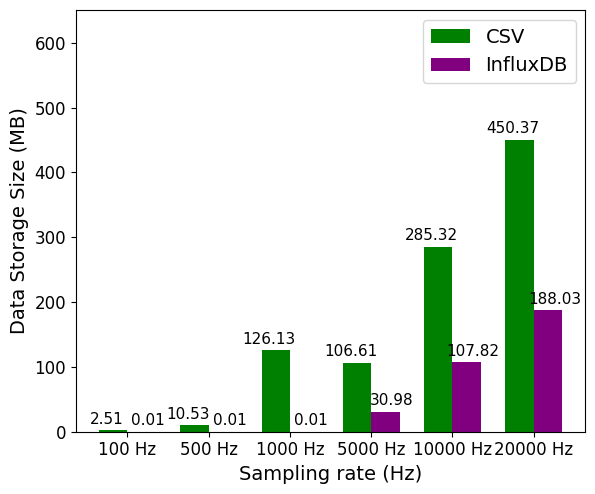

In [24]:
csv = [2630080, 11042816, 132259984, 111792128, 299183231, 472248320]
influx = [12230, 9520, 9172, 32483486, 113056314, 197158973]

def corvert_to_mb(size_in_bytes):
    return size_in_bytes / (1024 * 1024)

csv = [corvert_to_mb(size) for size in csv]
influx = [corvert_to_mb(size) for size in influx]

x = np.arange(len(sampling_rates))  # X locations for the groups
width = 0.35  # Width of the bars

plt.figure(figsize=(6, 5))

# Plotting side-by-side bars
bars1 = plt.bar(x - width/2, csv, width, label='CSV', color='green')
bars2 = plt.bar(x + width/2, influx, width, label='InfluxDB', color='purple')

plt.xlabel('Sampling rate (Hz)', fontsize=14)
plt.ylabel('Data Storage Size (MB)', fontsize=14)
plt.ylim([0, max(max(csv), max(influx)) + 200])
plt.xticks(x, sampling_rates)
plt.legend(fontsize=14)
plt.tight_layout()


for bar, value in zip(bars1, csv):
    plt.text(
        bar.get_x() + bar.get_width()/2 - 0.08,  # shift slightly left
        bar.get_height() + 5,
        f"{value:.2f}",
        ha='center',
        va='bottom',
        fontsize=11
    )

for bar, value in zip(bars2, influx):
    plt.text(
        bar.get_x() + bar.get_width()/2 + 0.08,  # shift slightly right
        bar.get_height() + 5,
        f"{value:.2f}",
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()